***

<center> <h1>COMP47650 DEEP LEARNING PROJECT</h1> </center>

<center> <h2> (A.1) Image Dataset</h2> </center>

<center> <h1> <a href="https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"> Chest X-Ray Images (Pneumonia) </a></h1> </center>

***

### Name: Prashant Uttam Wakchaure 
### Student No.: 20200126

***

<center><h2> <font color='green'> Testing the Submitted Checkpoint Models </font> </h2> </center>

***

<ul> 
    <li><h3 style="text-align:justify;"><b> There is nothing to be set or updated for the user to run my project, just place the dataset folder as suggested and let the other files be there as it is and run the whole notebook to see the project implementation and results. The 2 submitted notebooks act as README for my Project.</b></h3></li>
    <li><h3 style="text-align:justify;"><b> This Notebook is used to load the model checkpoints, which loads the metrics similar to what we see in my Report Paper and the other <i> DL_Prashant20200126-README.ipynb </i> script contains the whole implementation of the project </b></h3></li>
</ul>

<center><h2> <font color='red'> Imports </font> </h2> </center>

In [36]:
! pip install -r requirements.txt

In [1]:
import numpy as np
import pandas as pd
import torch
import time
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff

In [2]:
import utils # Contains Data Splitting Methods along with Device Loaders
import models_and_metrics # All the necessary Models, metrics and fit,test,validate functions

<center><h2> <font color='red'> Data Loading </font> </h2> </center>

<p style="text-align:justify;">
    <b>As the validation set contains just 16 images, I decided to combine the train and validation set and resplit it as 90-10%, for which I have defined 2 functions in the <i> utils.py</i> file. One of which uses the original splits and the other combines the train and valid sets and splits accordingly. </b></p>

In [3]:
# Without Combining and Splitting the train and validation dataset
train_dl_ws, val_dl_ws, test_dl_ws, trainset, validset, testset = utils.without_split_dataset()

100%|██████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 2002.05it/s]


In [4]:
# With Combining and Splitting the train and validation dataset
train_dl_s, val_dl_s, test_dl_s, trainset_s, validset_s, testset_s = utils.with_split_dataset()

100%|████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<?, ?it/s]


<center><h2> <font color='red'> Setting up the Device </font> </h2> </center>

In [5]:
device = utils.get_default_device()
device

device(type='cuda')

<center><h2> <font color='red'> Defining the Metrics </font> </h2> </center>

In [6]:
#Defining the lists to store all the scores to compare in the end
list_AUC_ROC = []
list_FNR = []
list_Recall = []
list_TNR = []
list_Precision = []
list_Accuracy = []
list_models = ['X Ray CNN (Original Dataset)', 'ResNet50 (Original Dataset)', 
               'X Ray CNN (Splitted Dataset)', 'ResNet50 (Splitted Dataset)']

***

<center><h2> <font color='green'> Without Combining & Splitting Train & Validation Set </font> </h2> </center>

***

<center><h2> <font color='red'> X-Ray CNN (My Model) </font> </h2> </center>

<center><h3> <font color='blue'> Testing the model on Unseen Data</font> </h3> </center>

In [7]:
# X-Ray CNN Model initialisation.
model = utils.to_device(models_and_metrics.xray_cnnmodel(), device)

In [8]:
# Loading the model checkpoint which contains the results as shown in the project report
model.load_state_dict(torch.load('xray_cnnmodel_not_split.pt'))

<All keys matched successfully>

In [9]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_ws, device)

In [10]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:13<00:00,  2.82it/s]

test_loss: 0.4593, test_acc: 0.8397


Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.70      0.77       234
           1       0.84      0.92      0.88       390

    accuracy                           0.84       624
   macro avg       0.84      0.81      0.82       624
weighted avg       0.84      0.84      0.84       624



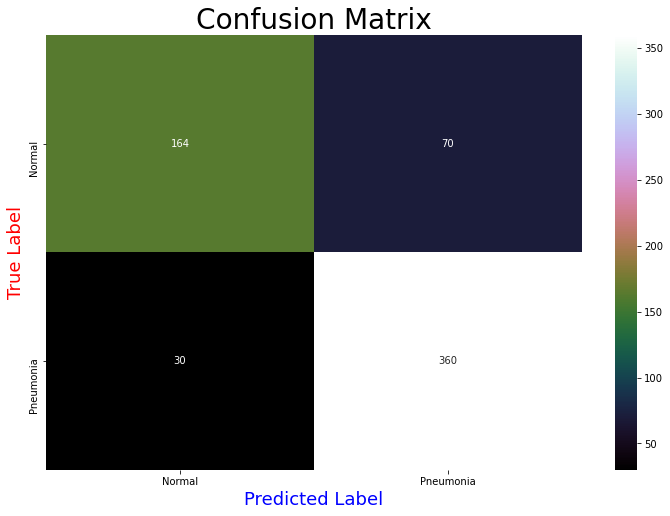

Accuracy of the model is 0.84
Recall (Sensitivity) of the model is 0.92
Precision of the model is 0.84
F1 Score of the model is 0.88
False Negative Rate (Miss Rate) of the model is 0.08
True Negative Rate (Specificity) of the model is 0.70
ROC-AUC of the model is 0.81


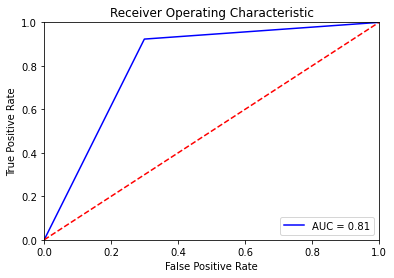

In [11]:
# Looking at the Evaluation Metrics
accuracy_xray_orig, precision_xray_orig, recall_xray_orig, \
roc_auc_xray_orig, fnr_xray_orig, tnr_spec_xray_orig = models_and_metrics.get_metrics(labels, preds)
list_Accuracy.append(round(accuracy_xray_orig * 100,2))
list_Precision.append(round(precision_xray_orig * 100,2))
list_Recall.append(round(recall_xray_orig * 100,2))
list_AUC_ROC.append(round(roc_auc_xray_orig * 100,2))
list_FNR.append(round(fnr_xray_orig * 100,2))
list_TNR.append(round(tnr_spec_xray_orig * 100,2))

<center><h3> <font color='blue'> Predictions against Actual Labels</font> </h3> </center>

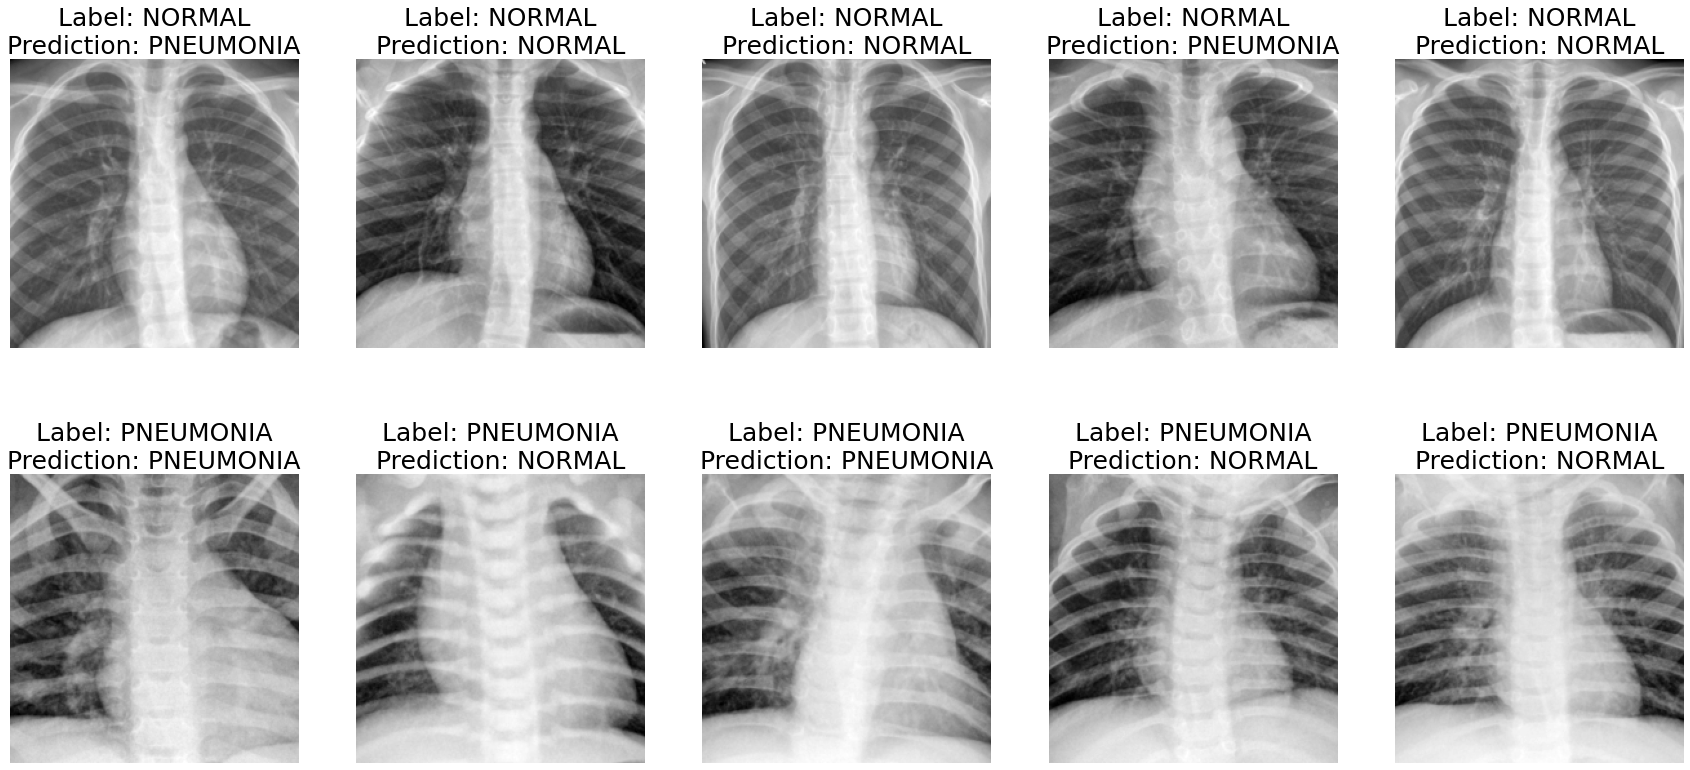

In [12]:
# select 5 normal and 5 pneumonia images indices
# Ref: https://www.kaggle.com/teyang/pneumonia-detection-resnets-pytorch/comments
idxs = torch.tensor(np.append(np.arange(start=0, stop=5, step=1), 
                             np.arange(start=500, stop=505, step=1))) 

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,14))

for c,i in enumerate(idxs):
    img_tensor, label = testset[i]
    ax[c//5][c%5].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//5][c%5].set_title('Label: {}\nPrediction: {}'
                            .format(testset.classes[label], 
                                    testset.classes[preds[i]]),
                            fontsize=25)
    ax[c//5][c%5].axis('off')
    

<center><h2> <font color='red'> ResNet50 (Transfer Learning) </font> </h2> </center>

In [13]:
# ResNet50 Transfer Learning Model initialisation.
model = utils.to_device(models_and_metrics.ResNet50(), device)

In [14]:
# Loading the model checkpoint which contains the results as shown in the project report
model.load_state_dict(torch.load('ResNet50_not_split.pt'))

<All keys matched successfully>

In [15]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_ws, device)

In [16]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:16<00:00,  2.40it/s]

test_loss: 0.3109, test_acc: 0.9183


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.81      0.88       234
           1       0.90      0.98      0.94       390

    accuracy                           0.92       624
   macro avg       0.93      0.90      0.91       624
weighted avg       0.92      0.92      0.92       624



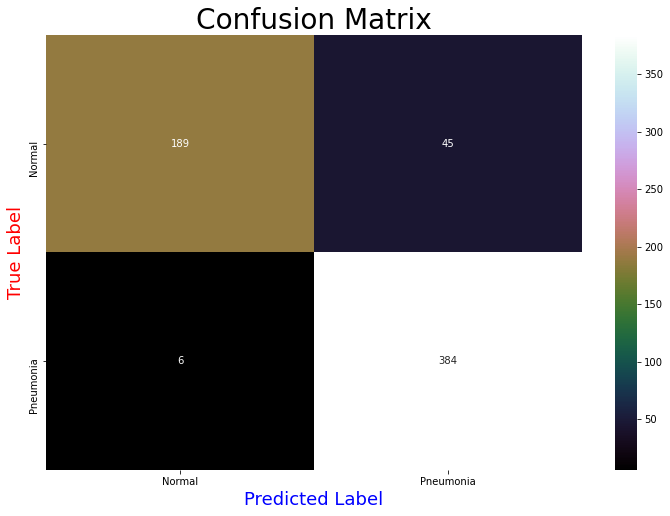

Accuracy of the model is 0.92
Recall (Sensitivity) of the model is 0.98
Precision of the model is 0.90
F1 Score of the model is 0.94
False Negative Rate (Miss Rate) of the model is 0.02
True Negative Rate (Specificity) of the model is 0.81
ROC-AUC of the model is 0.90


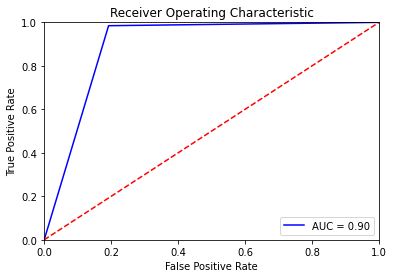

In [17]:
# Looking at the Evaluation Metrics
accuracy_resnet_orig, precision_resnet_orig, recall_resnet_orig, \
roc_auc_resnet_orig, fnr_resnet_orig, tnr_spec_resnet_orig = models_and_metrics.get_metrics(labels, preds)
list_Accuracy.append(round(accuracy_resnet_orig * 100,2))
list_Precision.append(round(precision_resnet_orig * 100,2))
list_Recall.append(round(recall_resnet_orig * 100,2))
list_AUC_ROC.append(round(roc_auc_resnet_orig * 100,2))
list_FNR.append(round(fnr_resnet_orig * 100,2))
list_TNR.append(round(tnr_spec_resnet_orig * 100,2))

<center><h3> <font color='blue'> Predictions against Actual Labels</font> </h3> </center>

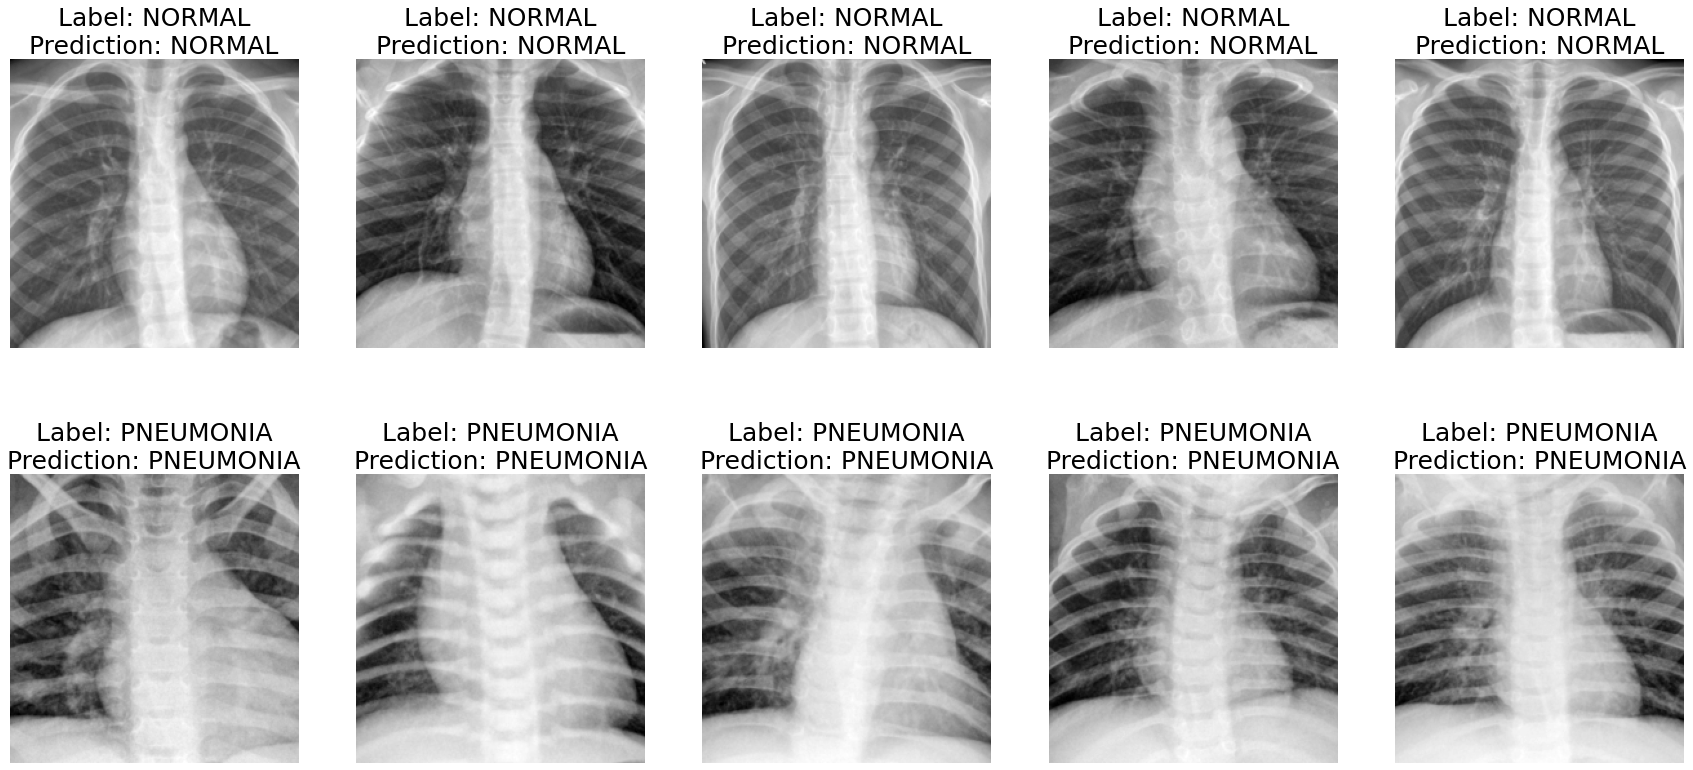

In [18]:
# select 5 normal and 5 pneumonia images indices
idxs = torch.tensor(np.append(np.arange(start=0, stop=5, step=1), 
                             np.arange(start=500, stop=505, step=1))) 

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,14))

for c,i in enumerate(idxs):
    img_tensor, label = testset[i]
    ax[c//5][c%5].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//5][c%5].set_title('Label: {}\nPrediction: {}'
                            .format(testset.classes[label], 
                                    testset.classes[preds[i]]),
                            fontsize=25)
    ax[c//5][c%5].axis('off')
    

***

<center><h2> <font color='green'> With Combining & Splitting Train & Validation Set </font> </h2> </center>

***

<center><h2> <font color='red'> X-Ray CNN (My Model) </font> </h2> </center>

In [19]:
# X-Ray CNN Model initialisation.
model = utils.to_device(models_and_metrics.xray_cnnmodel(), device)

In [20]:
# Loading the model checkpoint which contains the results as shown in the project report
model.load_state_dict(torch.load('xray_cnnmodel_split.pt'))

<All keys matched successfully>

In [21]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_s, device)

In [22]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:13<00:00,  2.95it/s]

test_loss: 0.6914, test_acc: 0.8221


Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.58      0.71       234
           1       0.79      0.97      0.87       390

    accuracy                           0.82       624
   macro avg       0.86      0.77      0.79       624
weighted avg       0.84      0.82      0.81       624



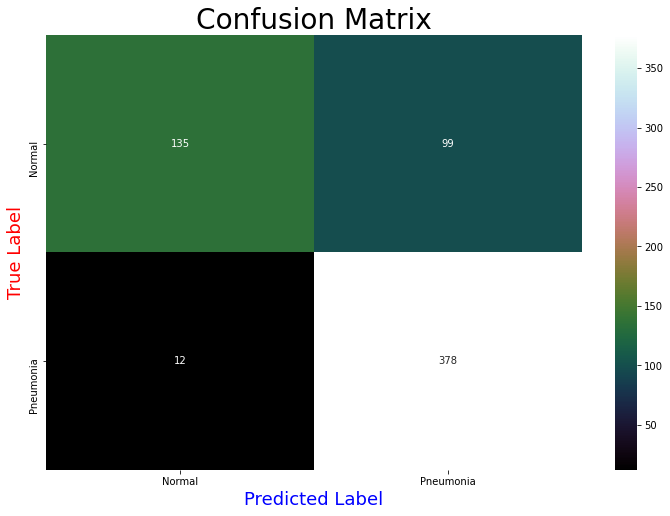

Accuracy of the model is 0.82
Recall (Sensitivity) of the model is 0.97
Precision of the model is 0.79
F1 Score of the model is 0.87
False Negative Rate (Miss Rate) of the model is 0.03
True Negative Rate (Specificity) of the model is 0.58
ROC-AUC of the model is 0.77


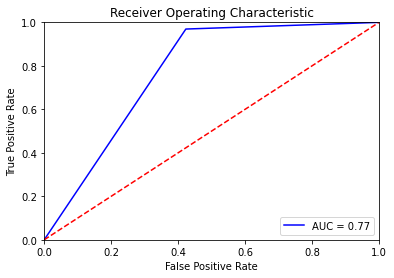

In [23]:
# Looking at the Evaluation Metrics
accuracy_xray_split, precision_xray_split, recall_xray_split, \
roc_auc_xray_split, fnr_xray_split, tnr_spec_xray_split = models_and_metrics.get_metrics(labels, preds)
list_Accuracy.append(round(accuracy_xray_split * 100,2))
list_Precision.append(round(precision_xray_split * 100,2))
list_Recall.append(round(recall_xray_split * 100,2))
list_AUC_ROC.append(round(roc_auc_xray_split * 100,2))
list_FNR.append(round(fnr_xray_split * 100,2))
list_TNR.append(round(tnr_spec_xray_split * 100,2))

<center><h3> <font color='blue'> Predictions against Actual Labels</font> </h3> </center>

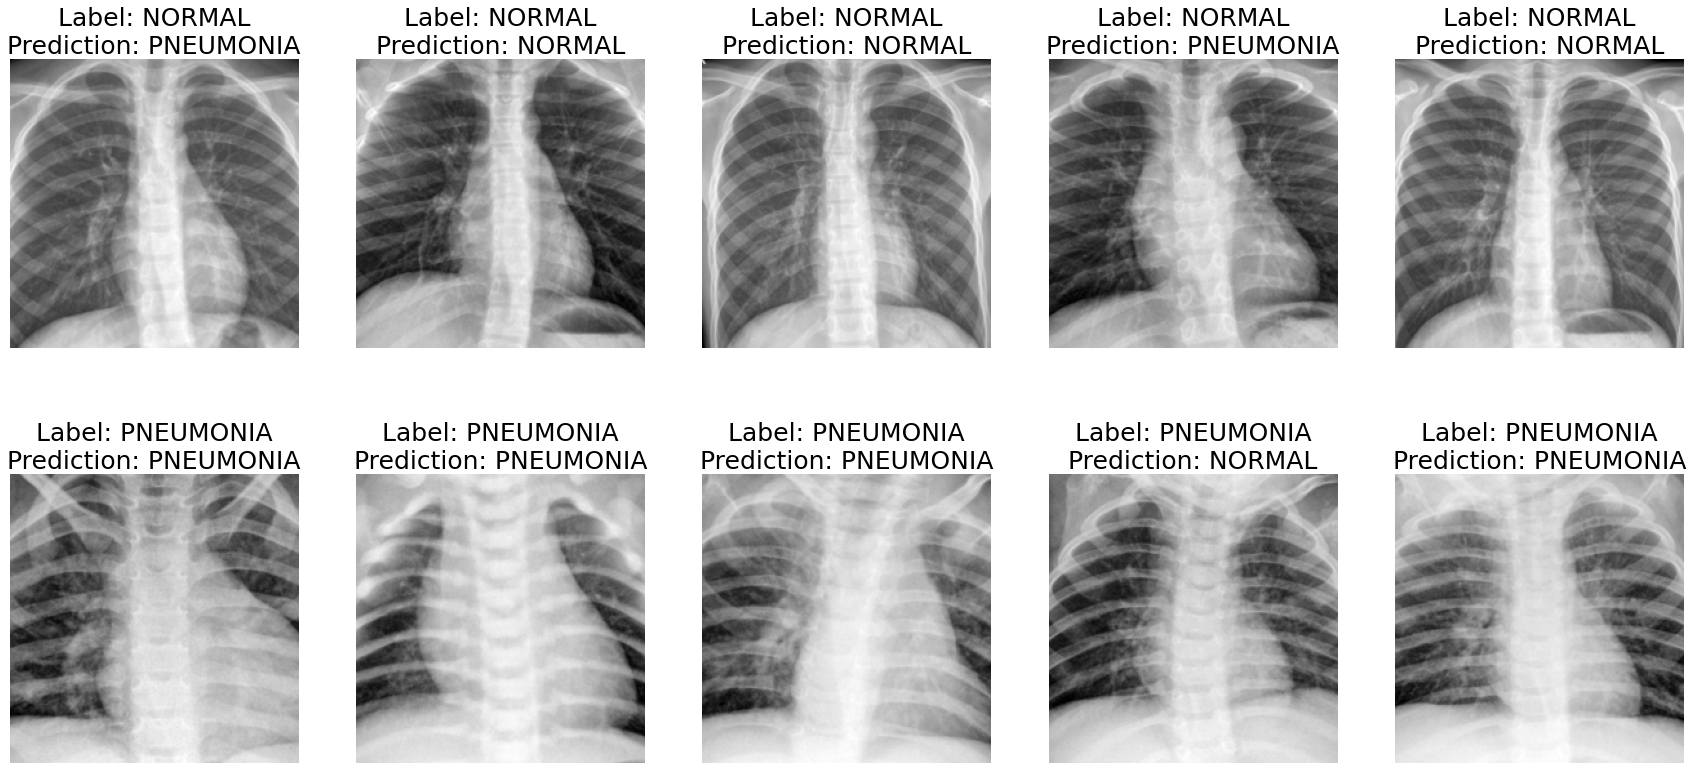

In [24]:
# select 5 normal and 5 pneumonia images indices
idxs = torch.tensor(np.append(np.arange(start=0, stop=5, step=1), 
                             np.arange(start=500, stop=505, step=1))) 

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,14))

for c,i in enumerate(idxs):
    img_tensor, label = testset_s[i]
    ax[c//5][c%5].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//5][c%5].set_title('Label: {}\nPrediction: {}'
                            .format(testset_s.classes[label], 
                                    testset_s.classes[preds[i]]),
                            fontsize=25)
    ax[c//5][c%5].axis('off')
    

<center><h2> <font color='red'> ResNet50 (Transfer Learning) </font> </h2> </center>

In [25]:
# ResNet50 Transfer Learning Model initialisation.
model = utils.to_device(models_and_metrics.ResNet50(), device)

In [26]:
# Loading the model checkpoint which contains the results as shown in the project report
model.load_state_dict(torch.load('ResNet50_split.pt'))

<All keys matched successfully>

In [27]:
# Loading the test data loader into Device.
test_dl = utils.DeviceDataLoader(test_dl_s, device)

In [28]:
# Predicting labels for the test dataset
preds,labels = models_and_metrics.test_predict(model, test_dl)

100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:16<00:00,  2.32it/s]

test_loss: 0.3148, test_acc: 0.9103


Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.78      0.87       234
           1       0.88      0.99      0.93       390

    accuracy                           0.91       624
   macro avg       0.93      0.88      0.90       624
weighted avg       0.92      0.91      0.91       624



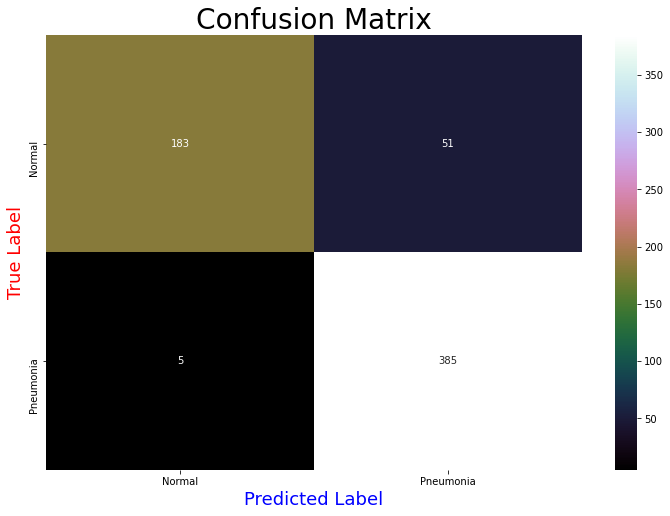

Accuracy of the model is 0.91
Recall (Sensitivity) of the model is 0.99
Precision of the model is 0.88
F1 Score of the model is 0.93
False Negative Rate (Miss Rate) of the model is 0.01
True Negative Rate (Specificity) of the model is 0.78
ROC-AUC of the model is 0.88


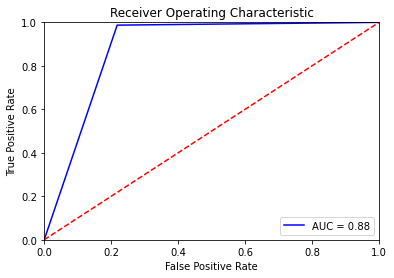

In [29]:
# Looking at the Evaluation Metrics
accuracy_resnet_split, precision_resnet_split, recall_resnet_split, \
roc_auc_resnet_split, fnr_resnet_split, tnr_spec_resnet_split = models_and_metrics.get_metrics(labels, preds)
list_Accuracy.append(round(accuracy_resnet_split * 100,2))
list_Precision.append(round(precision_resnet_split * 100,2))
list_Recall.append(round(recall_resnet_split * 100,2))
list_AUC_ROC.append(round(roc_auc_resnet_split * 100,2))
list_FNR.append(round(fnr_resnet_split * 100,2))
list_TNR.append(round(tnr_spec_resnet_split * 100,2))

<center><h3> <font color='blue'> Predictions against Actual Labels</font> </h3> </center>

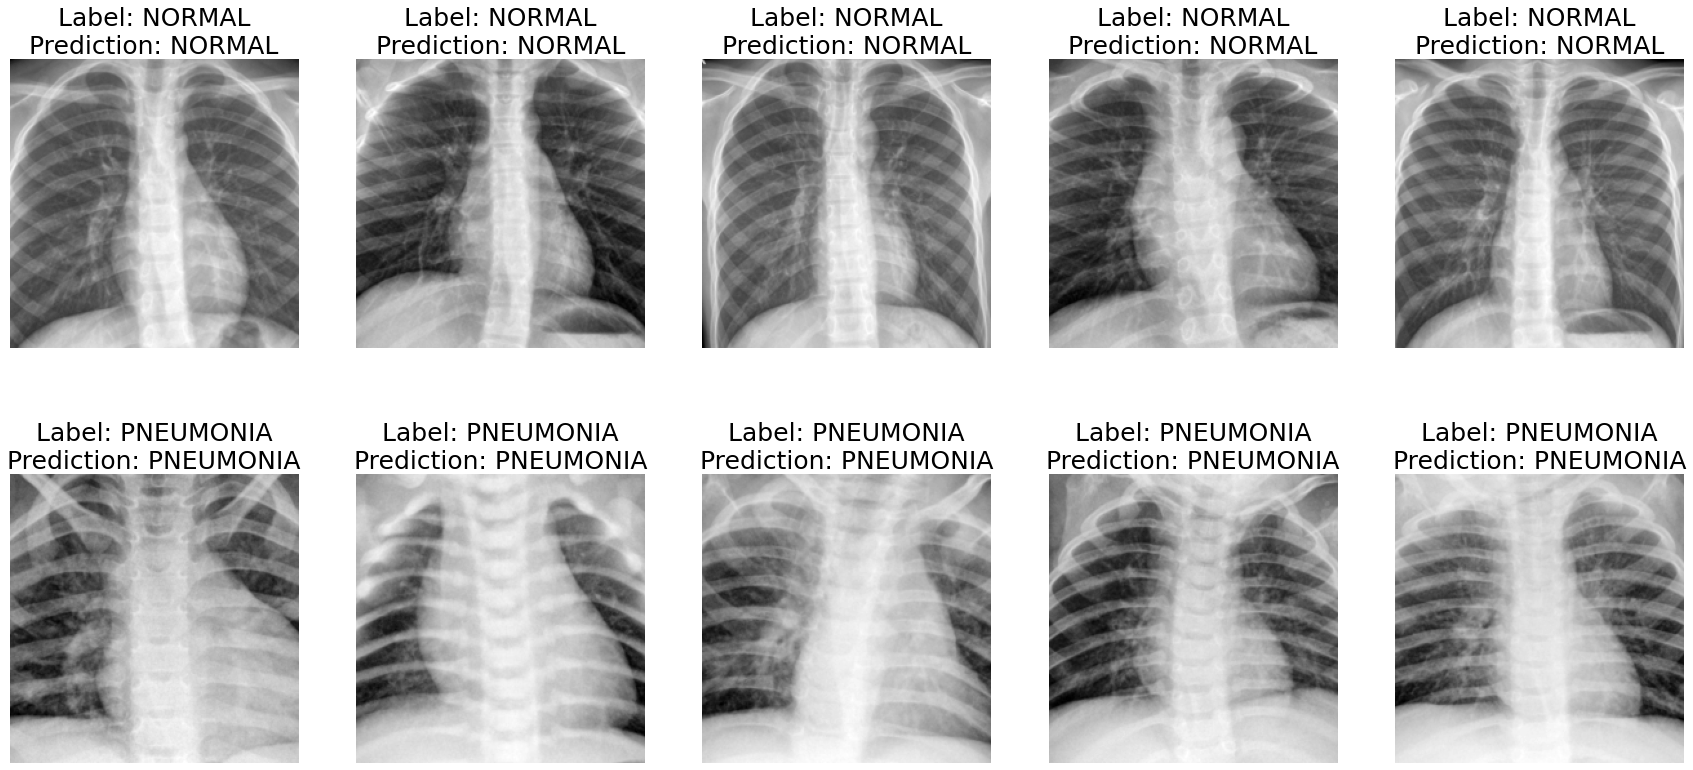

In [30]:
# select 5 normal and 5 pneumonia images indices
idxs = torch.tensor(np.append(np.arange(start=0, stop=5, step=1), 
                             np.arange(start=500, stop=505, step=1))) 

fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(30,14))

for c,i in enumerate(idxs):
    img_tensor, label = testset_s[i]
    ax[c//5][c%5].imshow(img_tensor[0,:,:], cmap='gray')
    ax[c//5][c%5].set_title('Label: {}\nPrediction: {}'
                            .format(testset_s.classes[label], 
                                    testset_s.classes[preds[i]]),
                            fontsize=25)
    ax[c//5][c%5].axis('off')
    

***

<center><h2> <font color='green'> Comparing All the Models </font> </h2> </center>

***

In [31]:
# Creating final dataframe
final_scores = pd.DataFrame(list_models, columns = ['Models'])
final_scores['AUC_ROC_Score'] = list_AUC_ROC
final_scores['FNR'] = list_FNR
final_scores['Recall(Sensitivity)'] = list_Recall
final_scores['TNR(Specificity)'] = list_TNR
final_scores['Precision'] = list_Precision
final_scores['Accuracy'] = list_Accuracy
final_scores = final_scores.sort_values(by = 'FNR')

In [32]:
final_scores

Models  AUC_ROC_Score   FNR  Recall(Sensitivity)  \
3   ResNet50 (Splitted Dataset)          88.46  1.28                98.72   
1   ResNet50 (Original Dataset)          89.62  1.54                98.46   
2  X Ray CNN (Splitted Dataset)          77.31  3.08                96.92   
0  X Ray CNN (Original Dataset)          81.20  7.69                92.31   

   TNR(Specificity)  Precision  Accuracy  
3             78.21      88.30     91.03  
1             80.77      89.51     91.83  
2             57.69      79.25     82.21  
0             70.09      83.72     83.97

In [33]:
fig = px.bar(x = final_scores['Models'], y=final_scores['AUC_ROC_Score'], text=final_scores['AUC_ROC_Score'] )

fig.update_layout(title={'text': f"Comparison of Models based on AUC-ROC Score", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, xaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Models", yaxis_title="AUC ROC Score")
fig.update_traces(marker_color='green')
fig.show()

In [34]:
fig = px.bar(x = final_scores['Models'], y=final_scores['FNR'], text=final_scores['FNR'] )

fig.update_layout(title={'text': f"Comparison of Models based on False Negative Rate", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, xaxis_title="Models", 
                  yaxis_title="False Negative Rate")
fig.update_traces(marker_color='red')
fig.show()

In [35]:
fig = px.bar(x = final_scores['Models'], y=final_scores['Accuracy'], text=final_scores['Accuracy'] )

fig.update_layout(title={'text': f"Comparison of Models based on Accuracy", 'x': 0.5, 
                         'xanchor': 'center', 'font': {'size': 20}}, xaxis={'categoryorder':'category ascending'}, 
                 xaxis_title="Models", yaxis_title="Accuracy")
fig.update_traces(marker_color='blue')
fig.show()